# 1.) Import the data from CCLE into a new Google Colab file

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/MachineLearning/insurance.csv')

In [ ]:
df.loc[df['sex'] == 'female','sex']= 1
df.loc[df['sex'] == 'male','sex']= 0

In [ ]:
df.loc[df['smoker'] == 'yes','smoker']= 1
df.loc[df['smoker'] == 'no','smoker']= 0

In [ ]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df.rename(columns = {'region':'southwest'}, inplace = True)
df['southeast'] = df.loc[:, 'southwest']
df['northwest'] = df.loc[:, 'southwest']
df['northeast'] = df.loc[:, 'southwest']

In [ ]:
df['charges1'] = df.loc[:, 'charges']
del df['charges']
df.rename(columns = {'charges1':'charges'}, inplace = True)

In [ ]:
df

,age,sex,bmi,children,smoker,southwest,southeast,northwest,northeast,charges
0,19,1,27.900,0,1,southwest,southwest,southwest,southwest,16884.92400
1,18,0,33.770,1,0,southeast,southeast,southeast,southeast,1725.55230
2,28,0,33.000,3,0,southeast,southeast,southeast,southeast,4449.46200
3,33,0,22.705,0,0,northwest,northwest,northwest,northwest,21984.47061
4,32,0,28.880,0,0,northwest,northwest,northwest,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,northwest,northwest,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,northeast,northeast,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,southeast,southeast,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,southwest,southwest,southwest,2007.94500


In [ ]:
df.loc[df['southwest'] == 'southwest','southwest']= 1
df.loc[df['southwest'] == 'southeast','southwest']= 0
df.loc[df['southwest'] == 'northwest','southwest']= 0
df.loc[df['southwest'] == 'northeast','southwest']= 0

df.loc[df['southeast'] == 'southwest','southeast']= 0
df.loc[df['southeast'] == 'southeast','southeast']= 1
df.loc[df['southeast'] == 'northwest','southeast']= 0
df.loc[df['southeast'] == 'northeast','southeast']= 0

df.loc[df['northwest'] == 'southwest','northwest']= 0
df.loc[df['northwest'] == 'southeast','northwest']= 0
df.loc[df['northwest'] == 'northwest','northwest']= 1
df.loc[df['northwest'] == 'northeast','northwest']= 0

df.loc[df['northeast'] == 'southwest','northeast']= 0
df.loc[df['northeast'] == 'southeast','northeast']= 0
df.loc[df['northeast'] == 'northwest','northeast']= 0
df.loc[df['northeast'] == 'northeast','northeast']= 1

In [ ]:
df.head()

,age,sex,bmi,children,smoker,southwest,southeast,northwest,northeast,charges
0,19,1,27.900,0,1,1,0,0,0,16884.92400
1,18,0,33.770,1,0,0,1,0,0,1725.55230
2,28,0,33.000,3,0,0,1,0,0,4449.46200
3,33,0,22.705,0,0,0,0,1,0,21984.47061
4,32,0,28.880,0,0,0,0,1,0,3866.85520


# 2.) Split the data into 80/20, in/out sample

In [ ]:
import numpy as np

In [ ]:
data = np.array(df.iloc[:, :-1])
target = np.array(df.iloc[:, -1])

In [ ]:
cut = int((len(data) * .8) // 1)

In [ ]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
modCV = LassoCV().fit(in_data_scale, in_target)

In [ ]:
a = modCV.alpha_

# 5.) Run a lambda regression with that Lambda

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)
mod1.predict(np.array(in_data_scale))
coef = mod1.coef_
coef

array([3528.01787345,    0.        , 1826.2934732 ,  357.05497525,
       9280.59465836,  -65.23906777,   -0.        ,    0.        ,
        184.60600107])

# 6.) Visualize the coefficients 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
x = df.columns.values.tolist()
x.pop(-1)
y = coef

In [ ]:
x

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'southwest',
 'southeast',
 'northwest',
 'northeast']

<BarContainer object of 9 artists>

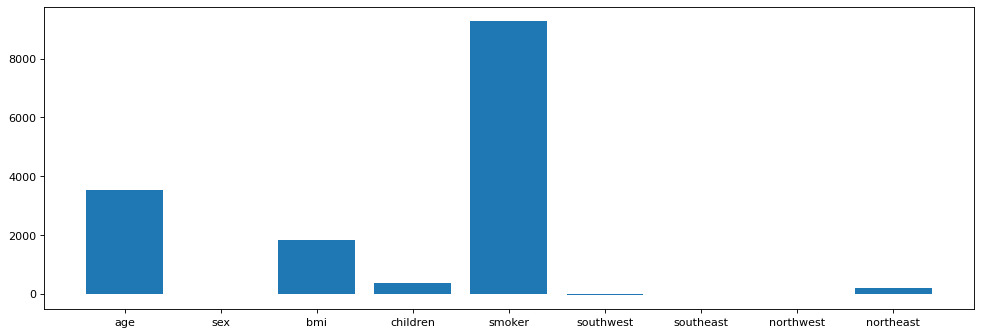

In [ ]:
plt.figure(figsize=(15, 5), dpi=80)
display(plt.bar(x, y, align='center'))

# 7.) Interpret the coefficients

Smoker, age, and BMI appear to have the most influence as they have the highest magnitude for our coefficients. Children, southwest, and northeast show some influence but not a lot. Sex, southeast, and northwest appear to have no affect among our coefficients. 

# 8.) Compare in and out of sample MSE’s

In [ ]:
train_pred = mod1.predict(in_data_scale)
test_pred = mod1.predict(out_data_scale)

In [ ]:
from sklearn import metrics

In [ ]:
np.sqrt(metrics.mean_squared_error(in_target,train_pred))

6050.049752739272

In [ ]:
np.sqrt(metrics.mean_squared_error(out_target,test_pred))

6107.789913453178